In [1]:
import pandas as pd
import numpy as np
import os, sys
from IPython.core.display import display
import matplotlib.pyplot as plt

/tmp/ipykernel_2659750/1663316393.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [2]:
all_the_log_files = [f for f in os.listdir() if f.endswith('lammps')]

for log_file in all_the_log_files:
    file_stem = log_file.replace('.log.lammps','')

    ## get the text from the log file
    with open(log_file, 'r') as f:
        txt = f.readlines()

    col_check_str = 'Step          Temp         v_strain      v_sigmaxx      v_sigmayy'
    end_check_str = 'Loop time of '
    columns = None
    start_idx, end_idx = 0, len(txt)

    for line_idx, line in enumerate(txt):
        if col_check_str in line:
            columns = line.strip().split()
            start_idx = line_idx + 1
        if end_check_str in line and columns:
            end_idx = line_idx - 1

    ## PRINT DEBUG
    # print(columns)
    # print(start_idx,end_idx)
    # print(data0[-1:])

    data0 = txt[start_idx:end_idx]
    data = [row for row in data0]

    ## write the CSV file
    csv_name = f'{file_stem}.csv'
    with open(csv_name, 'w') as f:
        f.write(",".join(columns) + "\n")
        for start_idx in data:
            columns_entry = start_idx.strip().split()
            f.write(",".join(columns_entry) + "\n")


In [3]:
import glob
glob.glob('CNT_*.csv')

['CNT_13_12_1.696.csv',
 'CNT_14_11_1.699.csv',
 'CNT_15_8_1.584.csv',
 'CNT_15_12_1.835.csv',
 'CNT_16_14_2.036.csv']

Loading CNT_13_12_1.696.csv
saving graph
creating graph


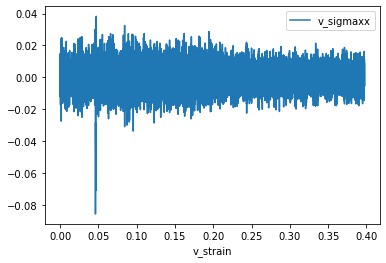

saving graph
creating graph


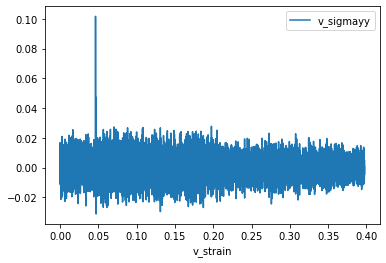

saving graph
creating graph


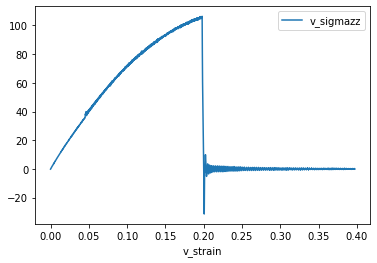

Loading CNT_14_11_1.699.csv
saving graph
creating graph


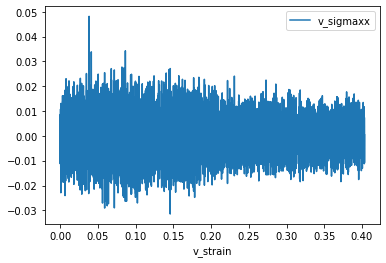

saving graph
creating graph


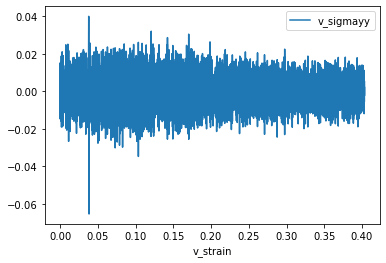

saving graph
creating graph


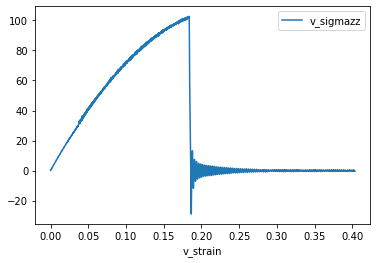

Loading CNT_15_8_1.584.csv
saving graph
creating graph


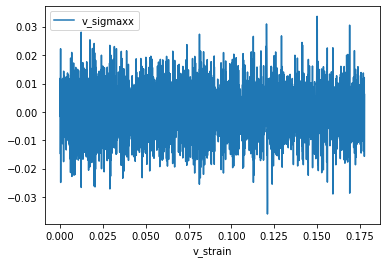

saving graph
creating graph


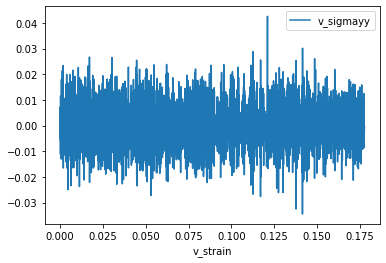

saving graph
creating graph


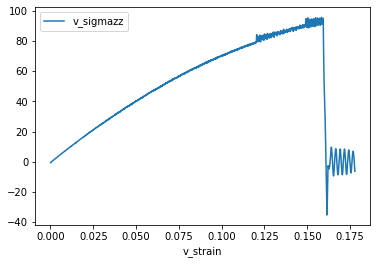

Loading CNT_15_12_1.835.csv
saving graph
creating graph


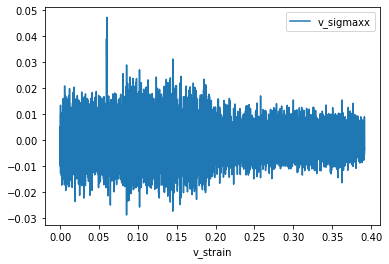

saving graph
creating graph


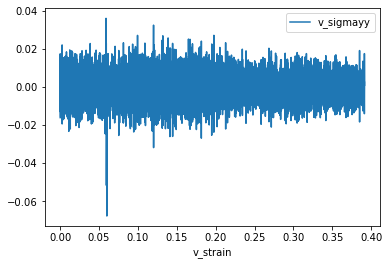

saving graph
creating graph


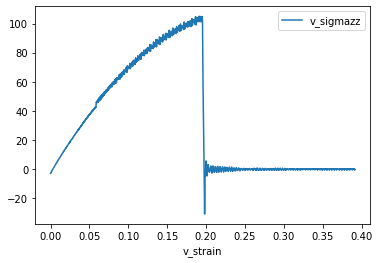

Loading CNT_16_14_2.036.csv
saving graph
creating graph


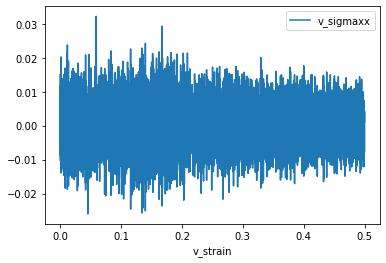

saving graph
creating graph


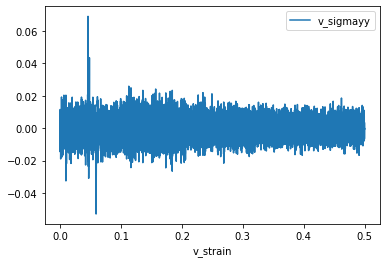

saving graph
creating graph


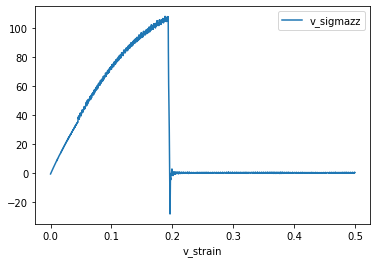

In [4]:
all_dfs = []
for one_filename in glob.glob('CNT_*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    info = one_filename.replace(".csv",'').split("_")
    new_df.loc[:,'chiral_index_n'] = int(info[1])
    new_df.loc[:,'chiral_index_m'] = int(info[2])
    new_df.loc[:,'length'] = float(info[3])
    new_df.loc[:,'filename'] = one_filename.replace(".csv","")
    
    new_df.plot(x ='v_strain', y='v_sigmaxx')
    print('saving graph')
    plt.savefig(f'{one_filename}_xx.pdf')
    print('creating graph')
    plt.show()
    
    
    new_df.plot(x ='v_strain', y='v_sigmayy')
    print('saving graph')
    plt.savefig(f'{one_filename}_yy.pdf')
    print('creating graph')
    plt.show()
  
    
    new_df.plot(x ='v_strain', y='v_sigmazz')
    print('saving graph')
    plt.savefig(f'{one_filename}_zz.pdf')
    print('creating graph')
    plt.show()
    
    ## Find the max stress fracture and append it to the title for references
    ## RECHECK
    max_sigmazz = np.max(v_sigmazz)
    print(f'Here is the maximum value of sigmazz: {max_sigmazz} GPa')
    
    ## Plot time on x axis for Lx
    new_df.plot(x ='Step', y='Lx')
    plt.show()
    
    max_Lx = np.max(Lx)
    print(f'Here is the maximum value of sigmazz: {max_Lx} GPa')
    
    ## Plot time on x axis for Ly
    new_df.plot(x ='Step', y='Ly')
    plt.show()
    
    max_Ly = np.max(Ly)
    print(f'Here is the maximum value of sigmazz: {max_Ly} GPa')
    
    ## Plot time on x axis for Lz
    new_df.plot(x ='Step', y='Lz')
    plt.show()
    
    max_Lz = np.max(Lz)
    print(f'Here is the maximum value of sigmazz: {max_Lz} GPa')
    
    ## Plot time on x axis for sigmazz
    new_df.plot(x ='Step', y='v_sigmazz')
    plt.show()
    
    max_sigmazz = np.max(v_sigmazz)
    print(f'Here is the maximum value of sigmazz: {max_sigmazz} GPa')
    
    all_dfs.append(new_df)
    finaldf = pd.concat(all_dfs, axis=0, join='inner', ignore_index=True).sort_index()


In [5]:
display(finaldf)
finaldf.to_csv("H:\\test1.csv", index = False)

,Step,Temp,v_strain,v_sigmaxx,v_sigmayy,v_sigmazz,PotEng,KinEng,Lx,Ly,Lz,Volume,v_cntdiameter,v_CorVol,chiral_index_n,chiral_index_m,length,filename
0,100,299.40464,0.00005,0.006998,-0.010794,-0.148976,-41483.015,217.77102,98.583480,98.591151,272.60924,2649614.30,17.444841,50769.769,13,12,1.696,CNT_13_12_1.696
1,200,295.53780,0.00010,-0.004537,0.016868,-0.049550,-41485.489,214.95849,98.505419,98.633652,272.62287,2648790.00,17.497259,50924.868,13,12,1.696,CNT_13_12_1.696
2,300,294.74755,0.00015,-0.001939,-0.005553,-0.041082,-41487.364,214.38369,98.528836,98.663511,272.63650,2650354.20,17.489869,50905.903,13,12,1.696,CNT_13_12_1.696
3,400,301.87284,0.00020,-0.007558,0.003009,0.017049,-41491.506,219.56625,98.440522,98.584289,272.65013,2645984.70,17.445724,50779.954,13,12,1.696,CNT_13_12_1.696
4,500,294.26733,0.00025,0.014784,0.003409,0.050213,-41484.817,214.03441,98.551216,98.569500,272.66376,2648695.10,17.481566,50886.827,13,12,1.696,CNT_13_12_1.696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37400,999600,299.99647,0.49980,-0.007815,-0.006517,0.172869,-59262.194,314.52501,22.421079,22.740264,490.30056,249985.26,22.760244,119135.330,16,14,2.036,CNT_16_14_2.036
37401,999700,300.21284,0.49985,0.003187,0.003529,0.119881,-59259.741,314.75186,22.410302,22.707385,490.31691,249512.15,22.767105,119175.210,16,14,2.036,CNT_16_14_2.036
37402,999800,300.73825,0.49990,0.004320,0.002210,0.105560,-59258.283,315.30272,22.424755,22.711684,490.33326,249728.66,22.967528,120228.340,16,14,2.036,CNT_16_14_2.036
37403,999900,298.03948,0.49995,-0.005277,-0.000743,0.066882,-59253.225,312.47325,22.430333,22.690435,490.34960,249565.39,22.691718,118788.520,16,14,2.036,CNT_16_14_2.036
